In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
import pandas as pd
data = pd.read_csv('DataSet/Hours.csv', header=0,  names=['Hours', 'Pass'])
data

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [5]:
x = data['Hours'].values
y = data['Pass'].values
print(len(x), x)
print(len(y), y)

20 [0.5  0.75 1.   1.25 1.5  1.75 1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 4.   4.25 4.5  4.75 5.   5.5 ]
20 [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]


In [6]:
def logf(a, b, x):
    #print('This is x - ', x)
    return 1.0 / (1.0 + np.exp(-a * x - b))

def dlogf(a, b, x):
    return logf(a, b, x) * (1 - logf(a, b, x))
##
## The derivative of the logistic function is f * (1 - f)
##
def one_step(x, y, a, b, eta):
    ycalc = logf(a, b, x)
    delta_a = sum((y - ycalc) * ycalc * (1 - ycalc) * x)
    delta_b = sum((y - ycalc) * ycalc * (1 - ycalc))
    a = a + delta_a * eta
    b = b + delta_b * eta
    error = sum((y - ycalc)**2)
    return a, b, error

In [7]:
import numpy as np
a, b = 1, 1
eta = 0.001
for times in range(100000):
    a, b, error = one_step(x, y, a, b, eta)
    if times % 1000 == 0:
        eta = max(0.00001, eta * 0.99)
        if times % 5000 == 0:
            print(a, b, error)
            

0.9992450475046264 0.9993890327191156 8.523889507182833
0.6179139520552147 -1.4979844156507485 3.084957105503622
0.8575843879108347 -2.25139110880418 2.797870875378567
0.9728737260919393 -2.606705125532272 2.732552054516108
1.0396398691127056 -2.8110921108627958 2.7100337056834203
1.082173567933465 -2.9408902089025872 2.700524220460017
1.1108900673116497 -3.0283736506111025 2.6959924159334374
1.131062584310428 -3.0897654381964674 2.6936492059306687
1.1456553293443181 -3.134146964141185 2.692362841512513
1.1564575274239577 -3.166985604175102 2.6916228693982727
1.1646060702708207 -3.1917494563504847 2.6911806463872994
1.1708518836621586 -3.210726553492437 2.690907701444394
1.1757062393717048 -3.225473431081711 2.6907344557232133
1.1795258843356653 -3.2370755338937856 2.6906217334216556
1.1825648693218924 -3.246305498436247 2.690546738535855
1.185007275774927 -3.253722977690618 2.690495822301691
1.1869885082922136 -3.2597395285544297 2.6904606043094135
1.1886094977629307 -3.26466186445074

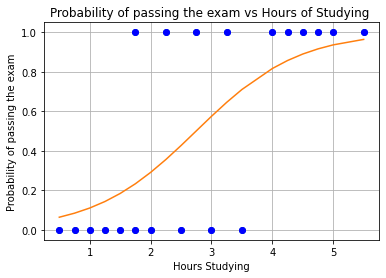

In [8]:
import matplotlib.pyplot as plt
plt.plot(data.Hours, data.Pass, "o")
plt.xlabel("Hours Studying")
plt.ylabel("Probability of passing the exam")
plt.title("Probability of passing the exam vs Hours of Studying ")

ycalc = logf(a, b, x)
plt.plot(x, ycalc)
plt.plot(x, y, "bo")
plt.grid(True)
plt.show()

In [10]:
data

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0
